In [10]:
import yfinance as yf
stock = yf.Ticker('^GSPC')
hist = stock.history(period='max')

In [11]:
import pandas as pd

HIST = pd.DataFrame(hist[['Open','High','Low','Close','Volume']])
HIST.columns = ['open','high','low','close','volume']
HIST.to_pickle('sp500_max_hist.pkl')

In [66]:
from pandas.io.pickle import read_pickle

raw = pd.read_pickle('sp500_max_hist.pkl')

In [67]:
raw['sma2'] = raw['close'].rolling(window=2).mean()
raw['sma5'] = raw['close'].rolling(window=5).mean()
raw['sma8'] = raw['close'].rolling(window=8).mean()
raw['sma10'] = raw['close'].rolling(window=10).mean()
raw['sma13'] = raw['close'].rolling(window=13).mean()
raw['sma20'] = raw['close'].rolling(window=20).mean()
raw['sma50'] = raw['close'].rolling(window=50).mean()
raw['sma200'] = raw['close'].rolling(window=200).mean()
weights = np.arange(1,16)
raw['wma15'] = raw['close'].rolling(15).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
raw['ema15'] = raw['close'].ewm(span=15).mean()
raw

,open,high,low,close,volume,sma2,sma5,sma8,sma10,sma13,sma20,sma50,sma200,wma15,ema15
Date,,,,,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.660000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.713333
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.715858
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.634999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.665758
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.605000,17.670000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.664280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3172510000,3744.055054,3730.714063,3715.720032,3715.765015,3707.763860,3698.268018,3585.477197,3234.555101,3714.720691,3705.116727
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,5006680000,3728.359985,3730.232031,3716.436279,3713.582007,3711.853084,3699.964514,3590.778994,3241.011401,3714.531177,3704.558374
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,4582620000,3713.755005,3728.532031,3721.386292,3715.327026,3714.333083,3701.351514,3596.246396,3248.121102,3717.346690,3707.346091


In [68]:
trading_system_initial = raw[['close','sma2','sma5','sma8','sma10','sma13','sma20','sma50','sma200','wma15','ema15']]

In [71]:
last_year = trading_system_initial.iloc[-21*12:]
last_year

,close,sma2,sma5,sma8,sma10,sma13,sma20,sma50,sma200,wma15,ema15
Date,,,,,,,,,,,
2020-01-09,3274.699951,3263.875000,3249.212012,3244.497528,3243.591016,3238.809232,3218.200000,3148.699194,2980.718292,3242.576426,3229.664426
2020-01-10,3265.350098,3270.025024,3255.312012,3250.005035,3246.135034,3242.203857,3224.386011,3153.268398,2983.018192,3246.569938,3234.125135
2020-01-13,3288.129883,3276.739990,3263.681982,3257.173767,3250.946021,3247.136155,3230.364001,3158.095596,2985.381642,3252.792505,3240.875728
2020-01-14,3283.149902,3285.639893,3272.875977,3260.336243,3257.132007,3251.733849,3236.081494,3163.007393,2987.625392,3257.702909,3246.160000
2020-01-15,3289.290039,3286.219971,3280.123975,3267.141235,3262.983008,3255.532320,3240.973499,3167.454995,2989.735892,3262.864748,3251.551255
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,3756.070068,3744.055054,3730.714063,3715.720032,3715.765015,3707.763860,3698.268018,3585.477197,3234.555101,3714.720691,3705.116727
2021-01-04,3700.649902,3728.359985,3730.232031,3716.436279,3713.582007,3711.853084,3699.964514,3590.778994,3241.011401,3714.531177,3704.558374
2021-01-05,3726.860107,3713.755005,3728.532031,3721.386292,3715.327026,3714.333083,3701.351514,3596.246396,3248.121102,3717.346690,3707.346091


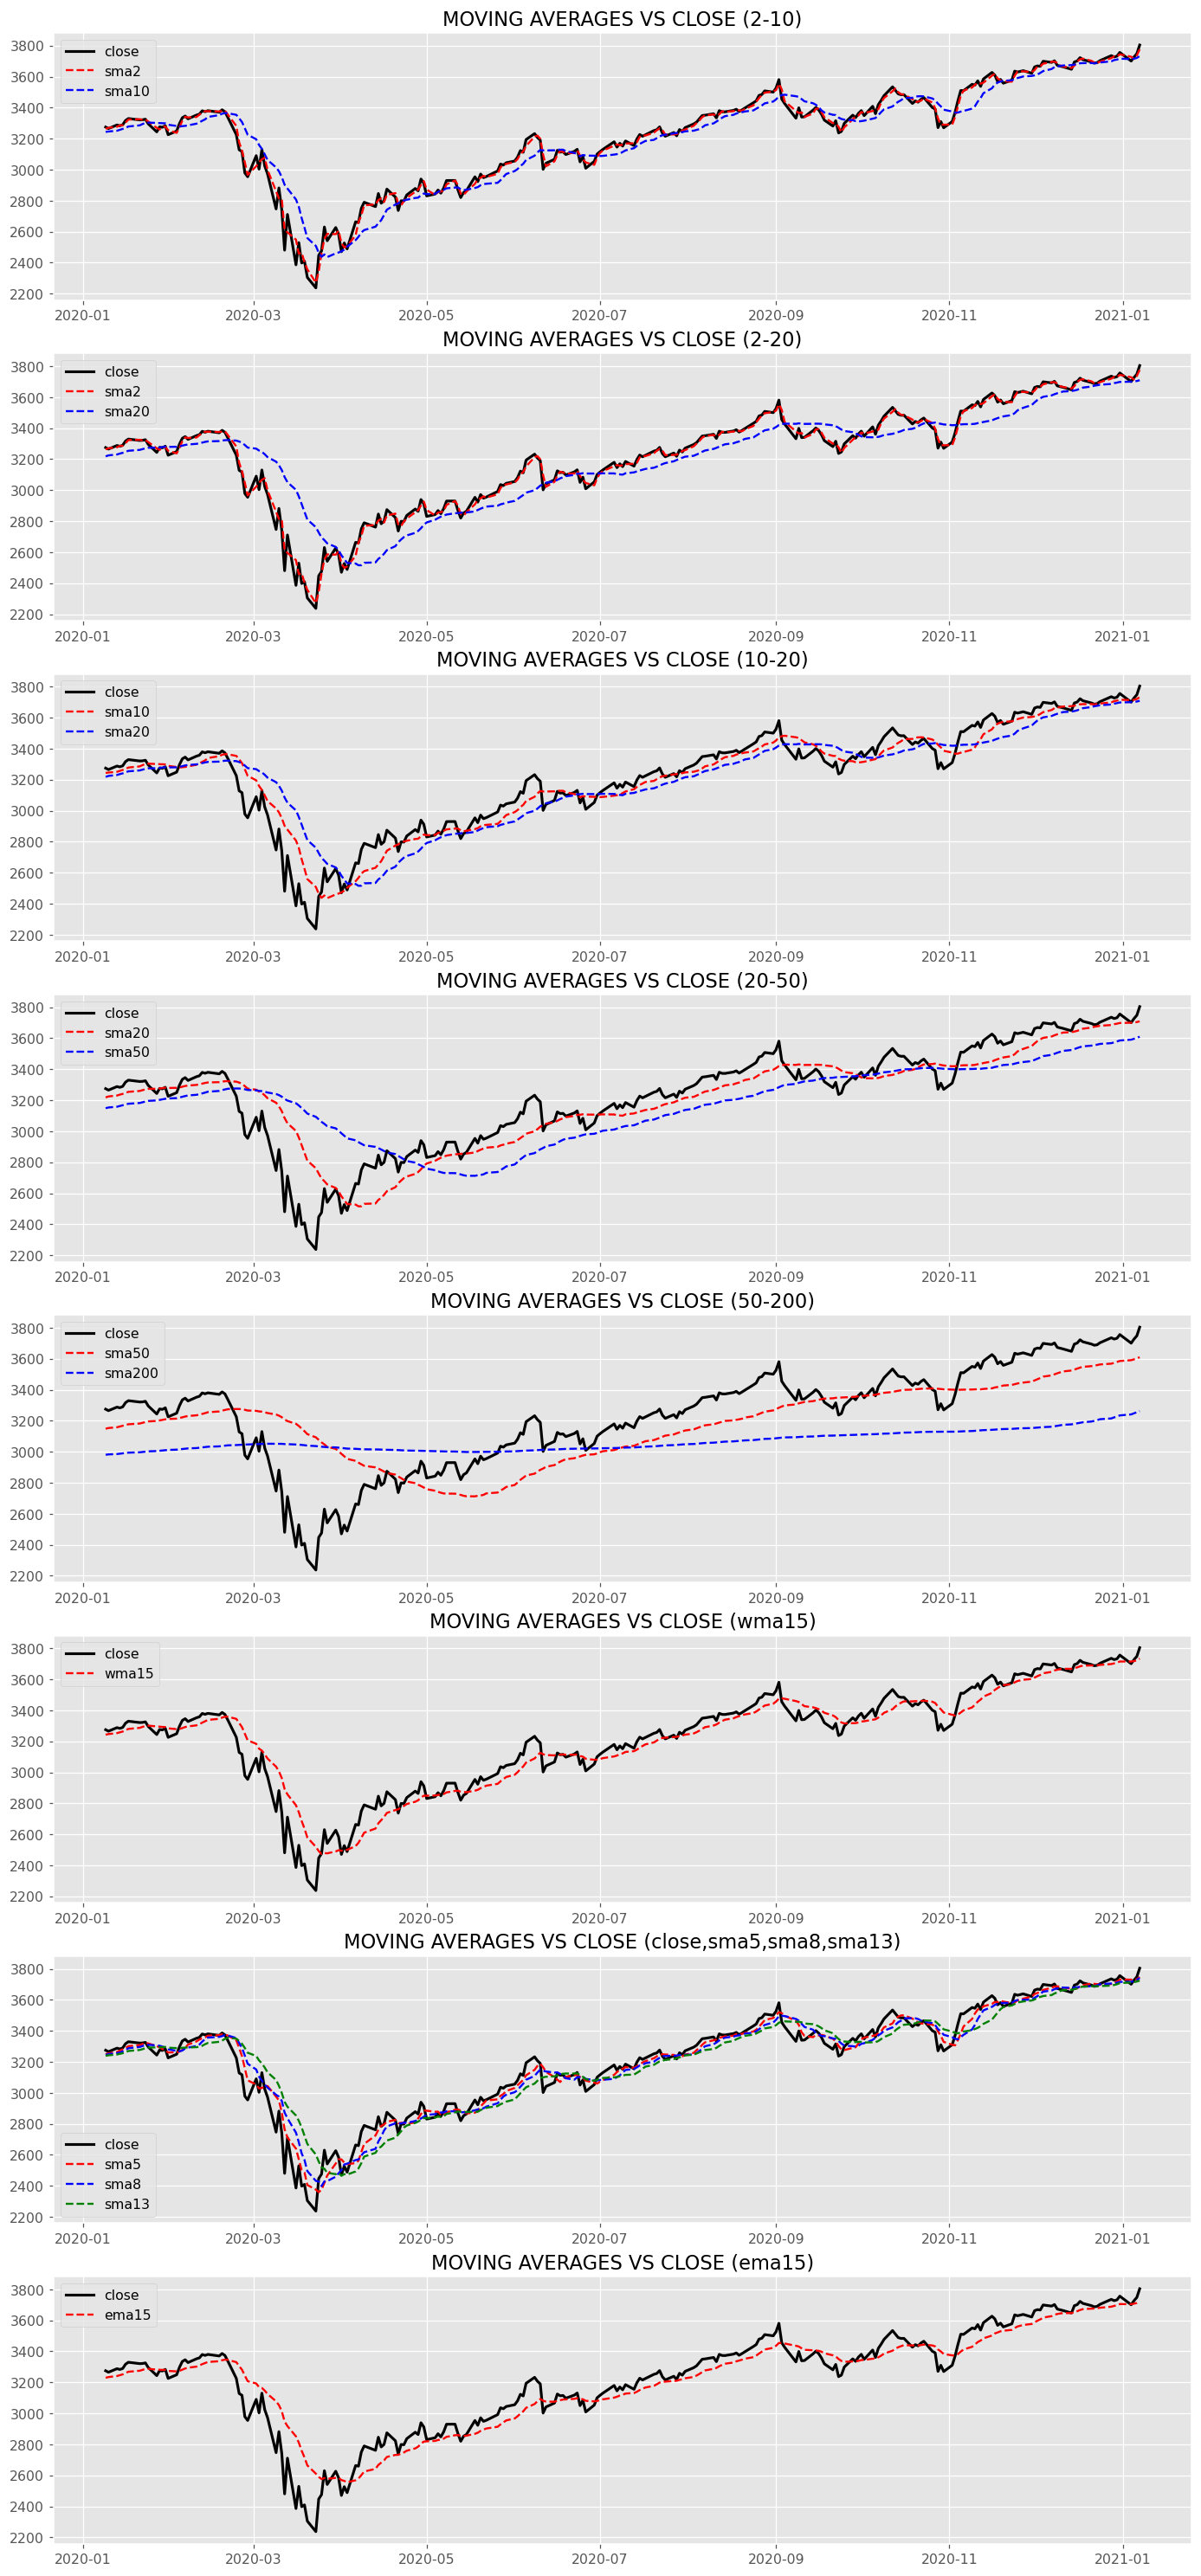

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8,1, figsize=(15,34), dpi=113)

axs[0].plot(last_year['close'], c='k', ls='-', lw=2)
axs[0].plot(last_year['sma2'], 'r--', lw=1.5) 
axs[0].plot(last_year['sma10'], 'b--', lw=1.5)

axs[1].plot(last_year['close'], c='k', ls='-', lw=2)
axs[1].plot(last_year['sma2'], 'r--', lw=1.5) 
axs[1].plot(last_year['sma20'], 'b--', lw=1.5)

axs[2].plot(last_year['close'], c='k', ls='-', lw=2)
axs[2].plot(last_year['sma10'], 'r--', lw=1.5) 
axs[2].plot(last_year['sma20'], 'b--', lw=1.5)

axs[3].plot(last_year['close'], c='k', ls='-', lw=2)
axs[3].plot(last_year['sma20'], 'r--', lw=1.5) 
axs[3].plot(last_year['sma50'], 'b--', lw=1.5)

axs[4].plot(last_year['close'], c='k', ls='-', lw=2)
axs[4].plot(last_year['sma50'], 'r--', lw=1.5) 
axs[4].plot(last_year['sma200'], 'b--', lw=1.5)

axs[5].plot(last_year['close'], c='k', ls='-', lw=2)
axs[5].plot(last_year['wma15'], 'r--', lw=1.5) 

axs[6].plot(last_year['close'], c='k', ls='-', lw=2)
axs[6].plot(last_year['sma5'], 'r--', lw=1.5) 
axs[6].plot(last_year['sma8'], 'b--', lw=1.5)
axs[6].plot(last_year['sma13'], 'g--', lw=1.5)

axs[7].plot(last_year['close'], c='k', ls='-', lw=2)
axs[7].plot(last_year['ema15'], 'r--', lw=1.5) 


axs[0].legend(['close','sma2', 'sma10'])
axs[1].legend(['close','sma2', 'sma20'])
axs[2].legend(['close','sma10', 'sma20'])
axs[3].legend(['close','sma20', 'sma50'])
axs[4].legend(['close','sma50', 'sma200'])
axs[5].legend(['close','wma15'])
axs[6].legend(['close','sma5', 'sma8','sma13'])
axs[7].legend(['close','ema15'])

axs[0].set_title('MOVING AVERAGES VS CLOSE (2-10)')
axs[1].set_title('MOVING AVERAGES VS CLOSE (2-20)')
axs[2].set_title('MOVING AVERAGES VS CLOSE (10-20)')
axs[3].set_title('MOVING AVERAGES VS CLOSE (20-50)')
axs[4].set_title('MOVING AVERAGES VS CLOSE (50-200)')
axs[5].set_title('MOVING AVERAGES VS CLOSE (wma15)')
axs[6].set_title('MOVING AVERAGES VS CLOSE (close,sma5,sma8,sma13)')
axs[7].set_title('MOVING AVERAGES VS CLOSE (ema15)');